<a href="https://colab.research.google.com/github/rnsabilla/Data-Mining/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('DataNaive.csv')

In [4]:
dataset.head()

,NIK,Gender,AGE,SALARY,PURCHASED
0,3374156411000002,MALE,21,210000,0
1,3374156612020001,MALE,19,1900000,1
2,3374091211850003,FEMALE,36,2500000,0
3,3374160707870008,FEMALE,34,3400000,0
4,3374096709930001,MALE,28,2800000,0


In [5]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, -1].values

In [5]:
print(x)

[[      21   210000]
 [      19  1900000]
 [      36  2500000]
 [      34  3400000]
 [      28  2800000]
 [      38  3800000]
 [      34  3400000]
 [      17  1700000]
 [      36  3600000]
 [      32  3200000]
 [      28  2800000]
 [      39  3900000]
 [      17   170000]
 [      19  1900000]
 [      40  4000000]
 [      21   210000]
 [      19  1900000]
 [      36  3600000]
 [      34   340000]
 [      28  2800000]
 [      38  3800000]
 [      34    34000]
 [      17  1700000]
 [      36  3600000]
 [      32  3200000]
 [      28  2800000]
 [      39  3900000]
 [      17  1700000]
 [      19  1900000]
 [      40  4000000]
 [      21  2100000]
 [      19  1900000]
 [      36  3600000]
 [      34  3400000]
 [      28  2800000]
 [      38  3800000]
 [      34  3400000]
 [      17  1700000]
 [      36  3600000]
 [      32  3200000]
 [      28  2800000]
 [      39  3900000]
 [      17  1700000]
 [      19  1900000]
 [      40  4000000]
 [      21  2100000]
 [      19  1900000]
 [      36  3

In [6]:
print(y)

[0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 0 1 0 1 0 0 1 0 0 1]


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
print(x_train)

[[      17  1700000]
 [      35  3500000]
 [      39  3900000]
 [      39  3900000]
 [      44  4400000]
 [      32  3200000]
 [      21  2100000]
 [      34  3400000]
 [      28  2800000]
 [      39  3900000]
 [      21  2100000]
 [      19  1900000]
 [      21   210000]
 [      28  2800000]
 [      32  3200000]
 [      39  3900000]
 [      32  3200000]
 [      32  3200000]
 [      34  3400000]
 [      32  3200000]
 [      19  1900000]
 [      44  4400000]
 [      21  2100000]
 [      34  3400000]
 [      34  3400000]
 [      17  1700000]
 [      19  1900000]
 [      40  4000000]
 [      17  1700000]
 [      17  1700000]
 [      19  1900000]
 [      19  1900000]
 [      34  3400000]
 [      17  1700000]
 [      32  3200000]
 [      36  2500000]
 [      44  4400000]
 [      21  2100000]
 [      39  3900000]
 [      19  1900000]
 [      28  2800000]
 [      32  3200000]
 [      34  3400000]
 [      21   210000]
 [      32  3200000]
 [      32  3200000]
 [      35  3500000]
 [      34  3

In [9]:
len(x_train)

149

In [10]:
len(x)

199

In [11]:
len(x_test)

50

In [12]:
len(y)

199

In [13]:
len(y_test)

50

In [14]:
len(y_train)

149

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
print(x_train)

[[-1.31939793 -0.71244089]
 [ 0.74033737  0.42821987]
 [ 1.19805633  0.68170004]
 [ 1.19805633  0.68170004]
 [ 1.77020503  0.99855026]
 [ 0.39704816  0.23810975]
 [-0.86167898 -0.45896072]
 [ 0.62590763  0.36484983]
 [-0.0606708  -0.01537043]
 [ 1.19805633  0.68170004]
 [-0.86167898 -0.45896072]
 [-1.09053845 -0.58570081]
 [-0.86167898 -1.65665453]
 [-0.0606708  -0.01537043]
 [ 0.39704816  0.23810975]
 [ 1.19805633  0.68170004]
 [ 0.39704816  0.23810975]
 [ 0.39704816  0.23810975]
 [ 0.62590763  0.36484983]
 [ 0.39704816  0.23810975]
 [-1.09053845 -0.58570081]
 [ 1.77020503  0.99855026]
 [-0.86167898 -0.45896072]
 [ 0.62590763  0.36484983]
 [ 0.62590763  0.36484983]
 [-1.31939793 -0.71244089]
 [-1.09053845 -0.58570081]
 [ 1.31248607  0.74507009]
 [-1.31939793 -0.71244089]
 [-1.31939793 -0.71244089]
 [-1.09053845 -0.58570081]
 [-1.09053845 -0.58570081]
 [ 0.62590763  0.36484983]
 [-1.31939793 -0.71244089]
 [ 0.39704816  0.23810975]
 [ 0.85476711 -0.20548055]
 [ 1.77020503  0.99855026]
 

In [17]:
print(x_test)

[[ 0.62590763 -1.57427347]
 [ 1.19805633  0.68170004]
 [ 1.19805633  0.68170004]
 [ 0.39704816  0.23810975]
 [ 0.62590763  0.36484983]
 [ 1.77020503  0.99855026]
 [ 1.08362659  0.61833   ]
 [ 1.77020503  0.99855026]
 [-1.31939793 -1.68200254]
 [-0.86167898 -0.45896072]
 [-1.31939793 -0.71244089]
 [ 0.39704816  0.23810975]
 [ 0.39704816  0.23810975]
 [ 0.74033737  0.42821987]
 [-0.86167898 -0.45896072]
 [-1.31939793 -0.71244089]
 [ 0.62590763  0.36484983]
 [ 1.77020503  0.99855026]
 [-1.31939793 -0.71244089]
 [ 0.39704816  0.23810975]
 [ 1.77020503  0.99855026]
 [ 0.39704816  0.23810975]
 [-0.86167898 -0.45896072]
 [-1.09053845 -0.58570081]
 [-0.86167898 -0.45896072]
 [ 0.39704816  0.23810975]
 [ 0.74033737  0.42821987]
 [-0.86167898 -0.45896072]
 [-1.31939793 -0.71244089]
 [ 1.31248607  0.74507009]
 [-1.09053845 -0.58570081]
 [-0.0606708  -0.01537043]
 [ 0.62590763  0.36484983]
 [-0.86167898 -0.45896072]
 [-1.31939793 -0.71244089]
 [ 0.39704816  0.23810975]
 [ 0.74033737  0.42821987]
 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[26  6]
 [17  1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


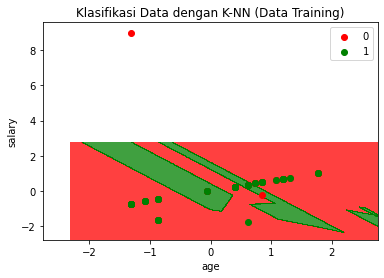

In [21]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red' , 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training)')
plt.xlabel('age')
plt.ylabel('salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


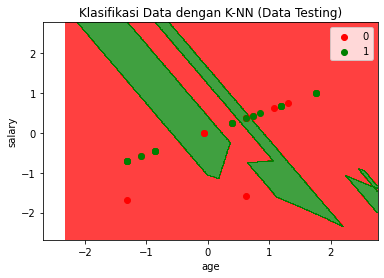

In [22]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red' , 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Testing)')
plt.xlabel('age')
plt.ylabel('salary')
plt.legend()
plt.show()